In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# データを読み込む

In [3]:
from utils import data

In [4]:
df = data.load("./data/autos.csv")

In [5]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,appraisal,years
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,240,23.250000
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,9150,4.833333
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,4900,11.583333
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,750,14.750000
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,1800,7.666667


In [6]:
df[(df["appraisal"] > 0) & (df["appraisal"] < 1)].head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,appraisal,years


# データを綺麗にする

NaNの入っているデータを消す。

In [7]:
df.dropna(inplace=True)

古すぎるデータと未来のデータが(なぜか)入っているので消す。

In [8]:
df["yearOfRegistration"].max(), df["yearOfRegistration"].min()

(2018, 1910)

In [9]:
df = df[(df["yearOfRegistration"] >= 1900) & (df["yearOfRegistration"] < 2017)]

査定額0になるものを消す。

In [10]:
df = df[df["appraisal"] > 0]

In [11]:
df.shape

(257217, 22)

In [12]:
np.histogram(df["appraisal"])

(array([257210,      4,      0,      0,      0,      0,      0,      0,
             0,      3]),
 array([  1.00000000e+00,   5.00000080e+06,   1.00000006e+07,
          1.50000004e+07,   2.00000002e+07,   2.50000000e+07,
          2.99999998e+07,   3.49999996e+07,   3.99999994e+07,
          4.49999992e+07,   4.99999990e+07]))

In [13]:
df = df[df["appraisal"] < 1.00000006e+07]

In [14]:
np.histogram(df["appraisal"])

(array([257207,      0,      0,      0,      0,      0,      0,      4,
             2,      1]),
 array([  1.00000000e+00,   7.00025900e+05,   1.40005080e+06,
          2.10007570e+06,   2.80010060e+06,   3.50012550e+06,
          4.20015040e+06,   4.90017530e+06,   5.60020020e+06,
          6.30022510e+06,   7.00025000e+06]))

In [15]:
df = df[df["appraisal"] < 1.40005080e+06]

In [16]:
np.histogram(df["appraisal"])

(array([257067,    100,     14,      7,      7,      2,      1,      7,
             0,      2]),
 array([  1.00000000e+00,   6.25009000e+04,   1.25000800e+05,
          1.87500700e+05,   2.50000600e+05,   3.12500500e+05,
          3.75000400e+05,   4.37500300e+05,   5.00000200e+05,
          5.62500100e+05,   6.25000000e+05]))

# データを学習用データ、チューニング用データ、テスト用データに分離する

In [17]:
train_df, dev_df, test_df = data.split(df)

In [18]:
len(train_df), len(dev_df), len(test_df)

(208337, 23149, 25721)

## 今回は全員同じデータを使っていただきたいのであらかじめ用意したデータに差し替えます

(今回だけです)

In [19]:
train_df = data.load("data/train.csv")
dev_df = data.load("data/dev.csv")
test_df = data.load("data/test.csv")

In [20]:
len(train_df), len(dev_df), len(test_df)

(208337, 23149, 25721)

# データを観察する

In [21]:
train_df.describe()

,Unnamed: 0,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,appraisal,years
count,208337.000000,2.083370e+05,208337.000000,208337.000000,208337.000000,208337.000000,208337.0,208337.000000,208337.000000,208337.000000
mean,185850.147084,6.856271e+03,2003.369603,126.639205,123944.474577,6.196504,0.0,51918.697605,3428.056481,12.377566
std,107267.569846,1.196289e+04,6.481386,146.867790,39844.712136,3.463700,0.0,25794.574051,5981.448604,6.495874
min,6.000000,2.000000e+00,1923.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,1.000000,-0.750000
25%,92904.000000,1.600000e+03,1999.000000,80.000000,100000.000000,3.000000,0.0,31303.000000,800.000000,7.833333
50%,185986.000000,3.900000e+03,2004.000000,116.000000,150000.000000,6.000000,0.0,51109.000000,1950.000000,11.916667
75%,278784.000000,8.800000e+03,2008.000000,151.000000,150000.000000,9.000000,0.0,72793.000000,4400.000000,16.250000
max,371527.000000,1.250000e+06,2016.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000,625000.000000,93.250000


ブランドごとのデータの数

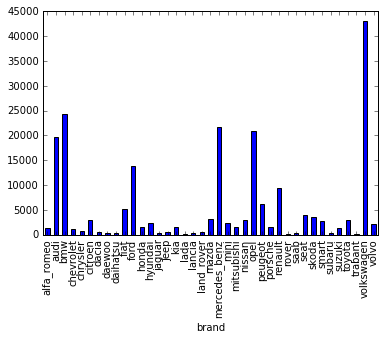

In [22]:
train_df.groupby("brand").size().plot(kind="bar")

走行距離と査定額の関係

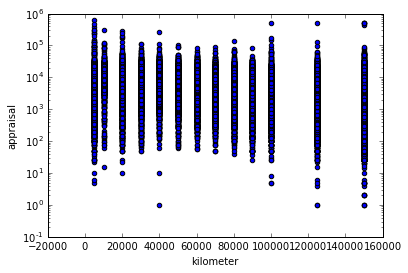

In [23]:
train_df.plot(x="kilometer", y="appraisal", kind="scatter", logy=True)

使用期間と査定額の関係

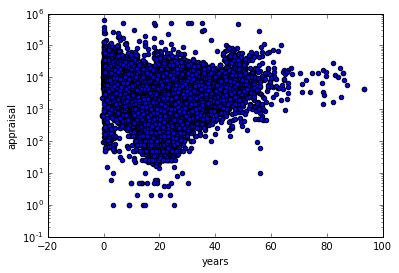

In [24]:
train_df.plot(x="years", y="appraisal", kind="scatter", logy=True)

メーカーごとの価格の平均値

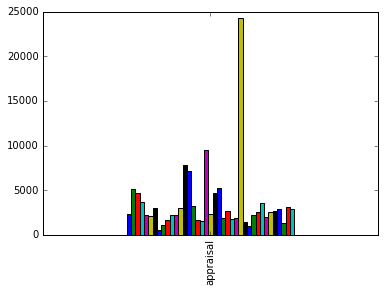

In [25]:
pd.pivot_table(train_df[["brand", "appraisal"]], columns=["brand"], aggfunc=[np.mean]).plot.bar(legend=False)

メーカー別にプロットを分ける

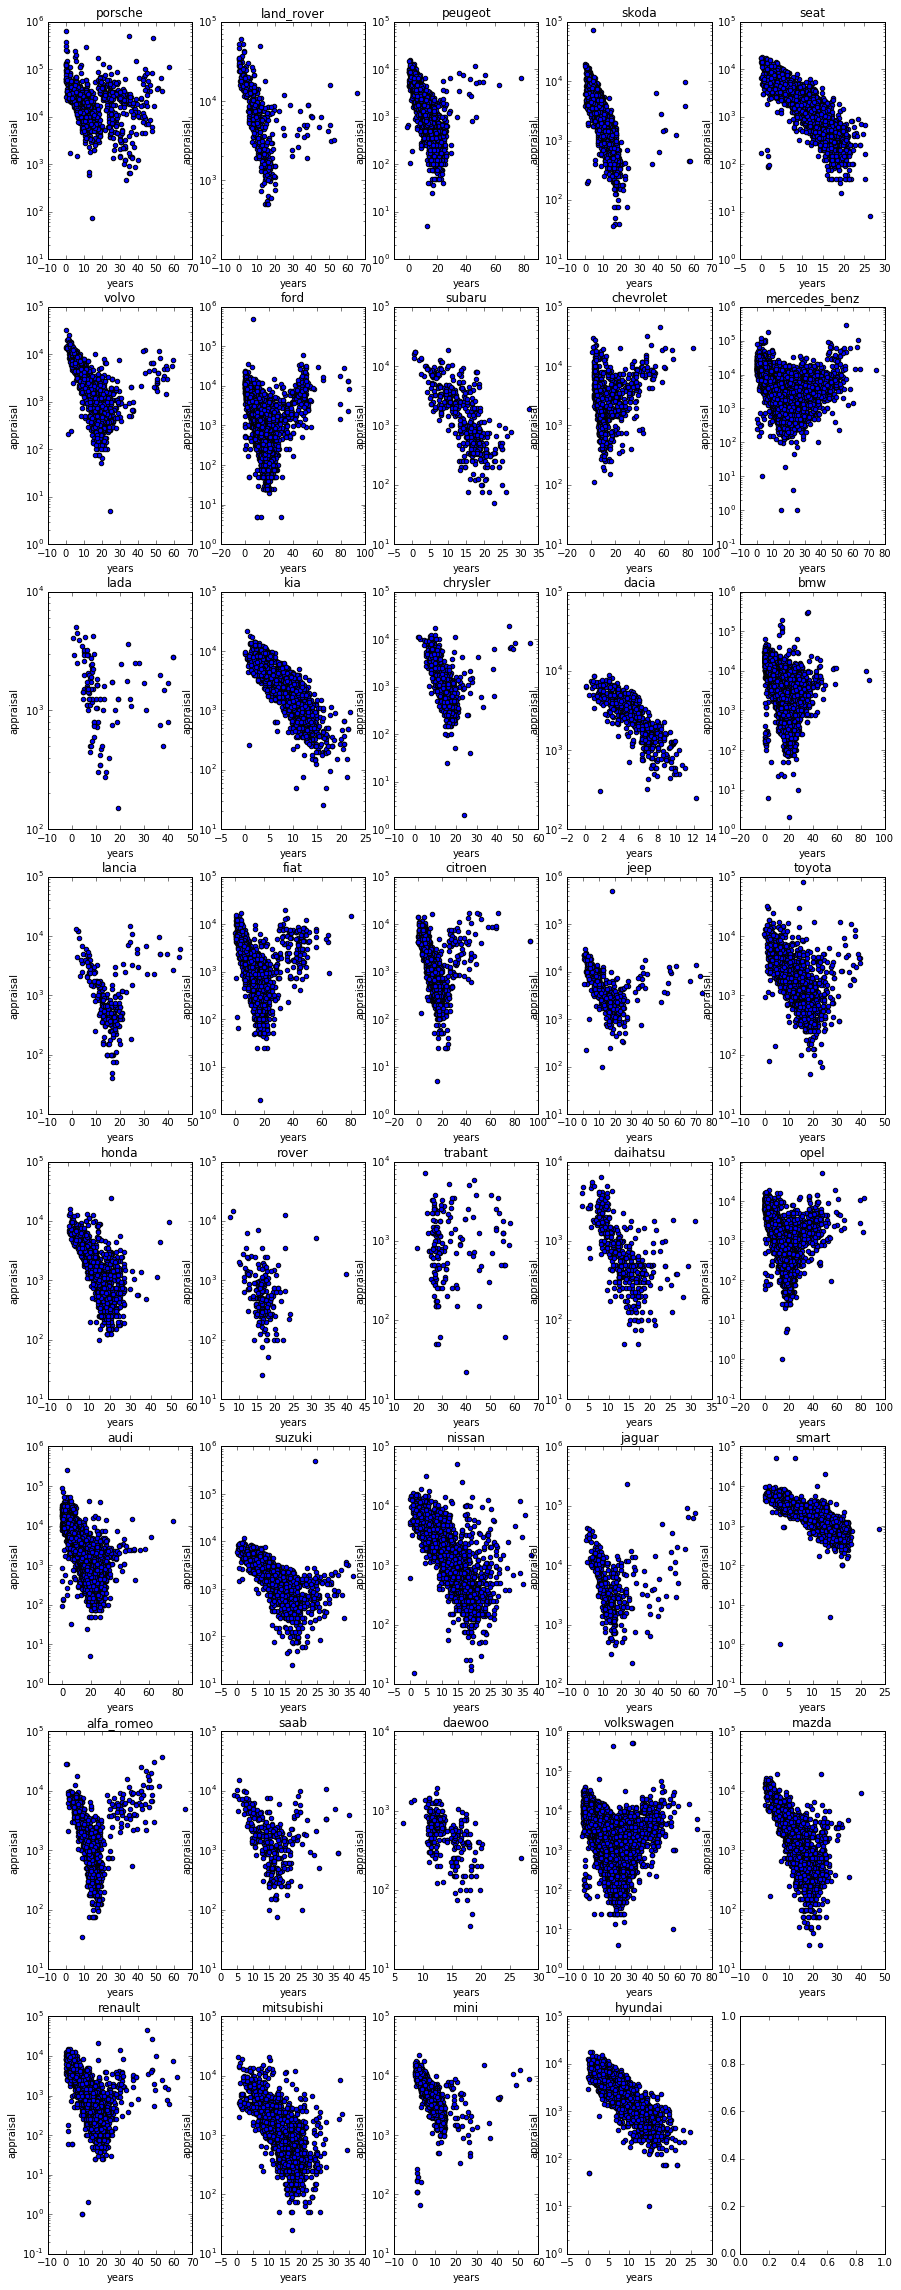

In [26]:
figure, axes = plt.subplots(8, 5, figsize=(15, 40))
for i, (ax, b) in enumerate(zip(axes.flatten(), set(train_df["brand"].values.tolist()))):
    train_df[train_df["brand"] == b].plot(x="years", y="appraisal", kind="scatter", logy=True, title=b, ax=ax)

# 学習

## 線形回帰モデル

In [27]:
train_features, dev_features, test_features = data.df_to_feature(train_df, dev_df, test_df)

In [28]:
from utils import model

In [29]:
linear_model, train_est = model.train(train_features, train_df["appraisal"])

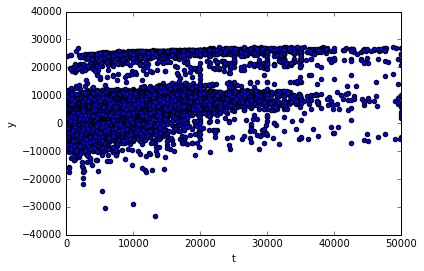

In [30]:
pd.DataFrame(dict(t=train_df["appraisal"], y=train_est.flatten())).plot(kind="scatter", x="t", y="y", xlim=[0, 50000])

In [31]:
def create_confusion_graph(df, est):
    figure, axes = plt.subplots(8, 5, figsize=(15, 40))
    for i, (ax, b) in enumerate(zip(axes.flatten(), set(train_df["brand"].values.tolist()))):
        brand_df = df[df["brand"] == b]
        brand_est = est[(df["brand"] == b).values]
        u = max(brand_df["appraisal"].max(), brand_est.max())
        l = max(1, min(brand_df["appraisal"].min(), brand_est.min()))
        ax = pd.DataFrame(dict(t=brand_df["appraisal"], y=brand_est)).plot(
            kind="scatter", x="t", y="y", title=b, ax=ax, logx=True, logy=True, xlim=[l, u], ylim=[l, u])
        pd.DataFrame(dict(x=(l, u), y=(l, u))).plot(kind="line", x="x", y="y", ax=ax, logx=True, logy=True, color="red")

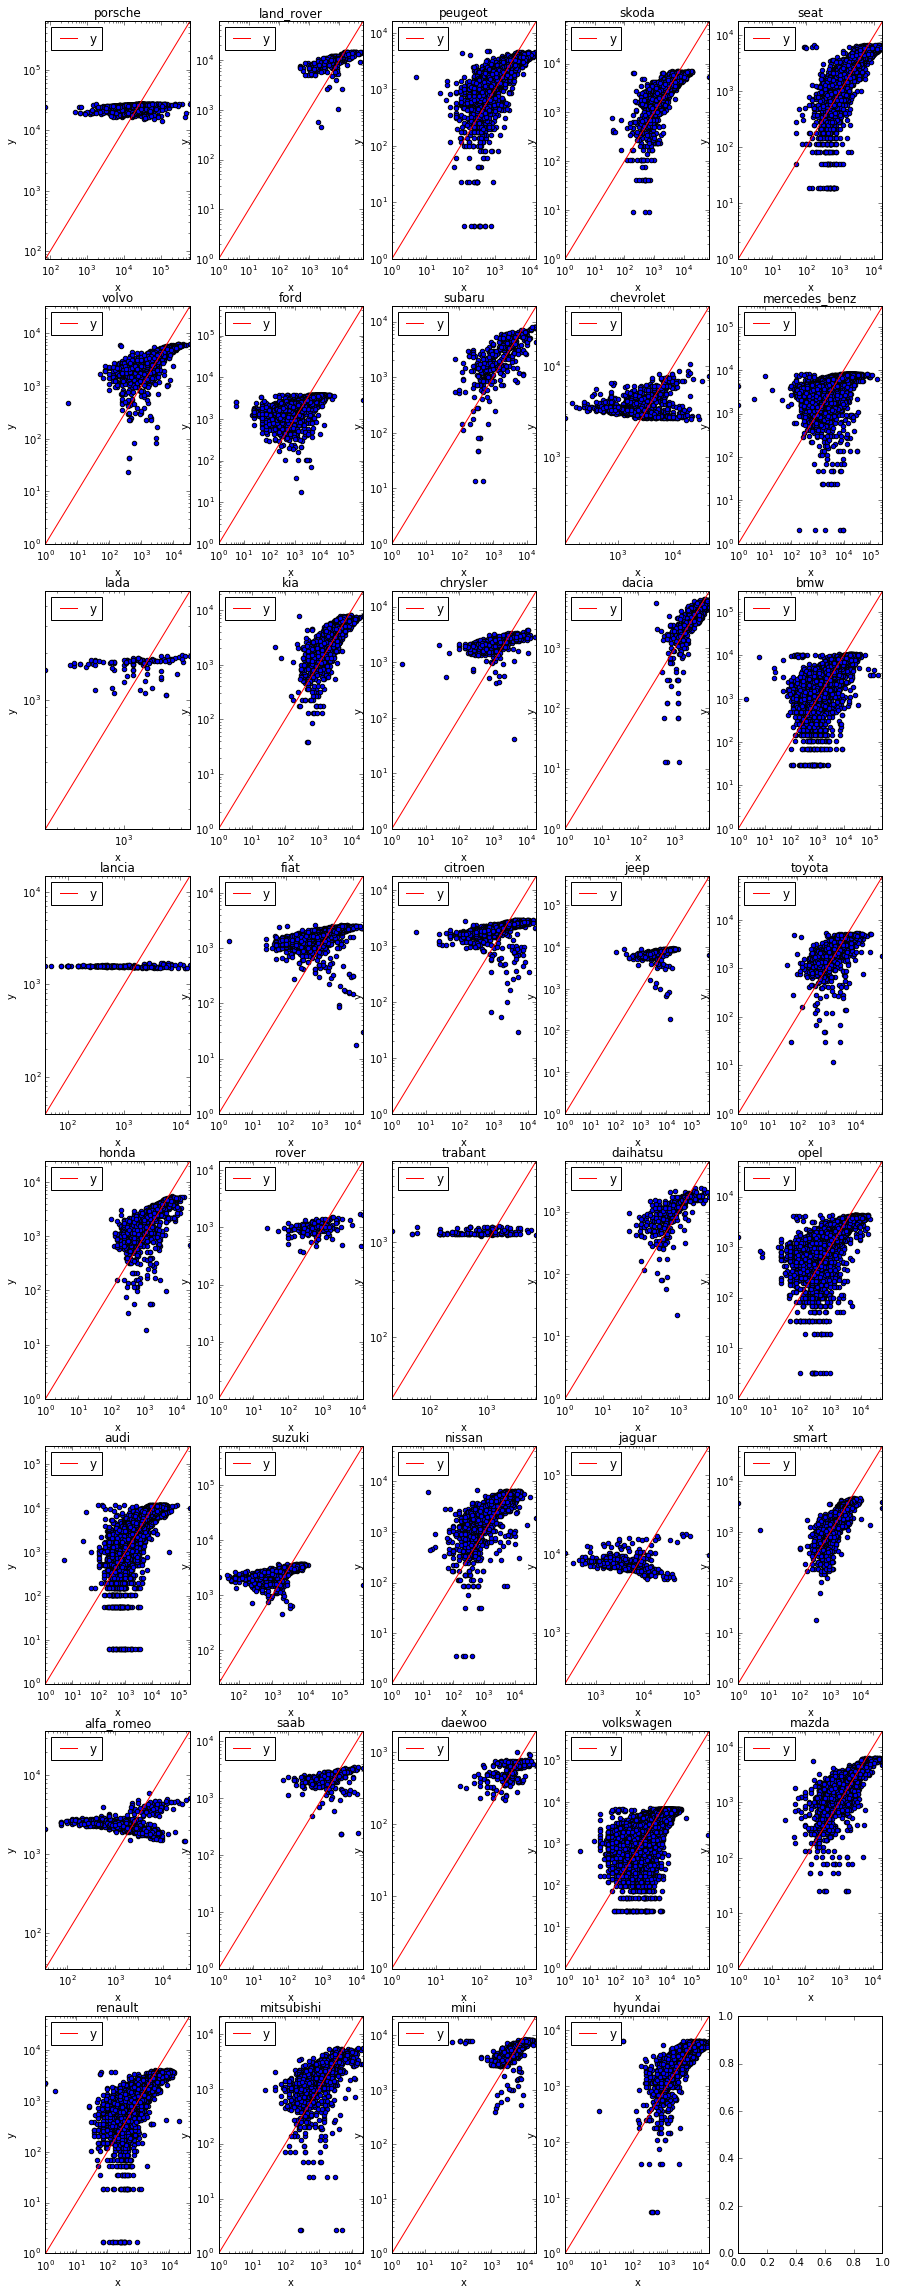

In [32]:
create_confusion_graph(train_df, train_est)

In [33]:
test_est = model.test(linear_model, test_features)

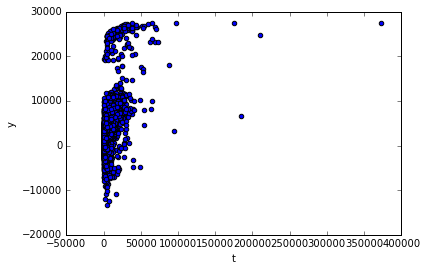

In [34]:
pd.DataFrame(dict(t=test_df["appraisal"], y=test_est)).plot(kind="scatter", x="t", y="y")

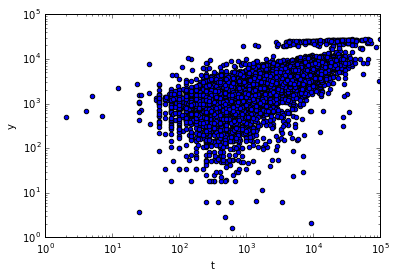

In [35]:
pd.DataFrame(dict(t=test_df["appraisal"], y=test_est)).plot(kind="scatter", x="t", y="y", xlim=[1, 100000], ylim=[1, 100000], logx=True, logy=True)

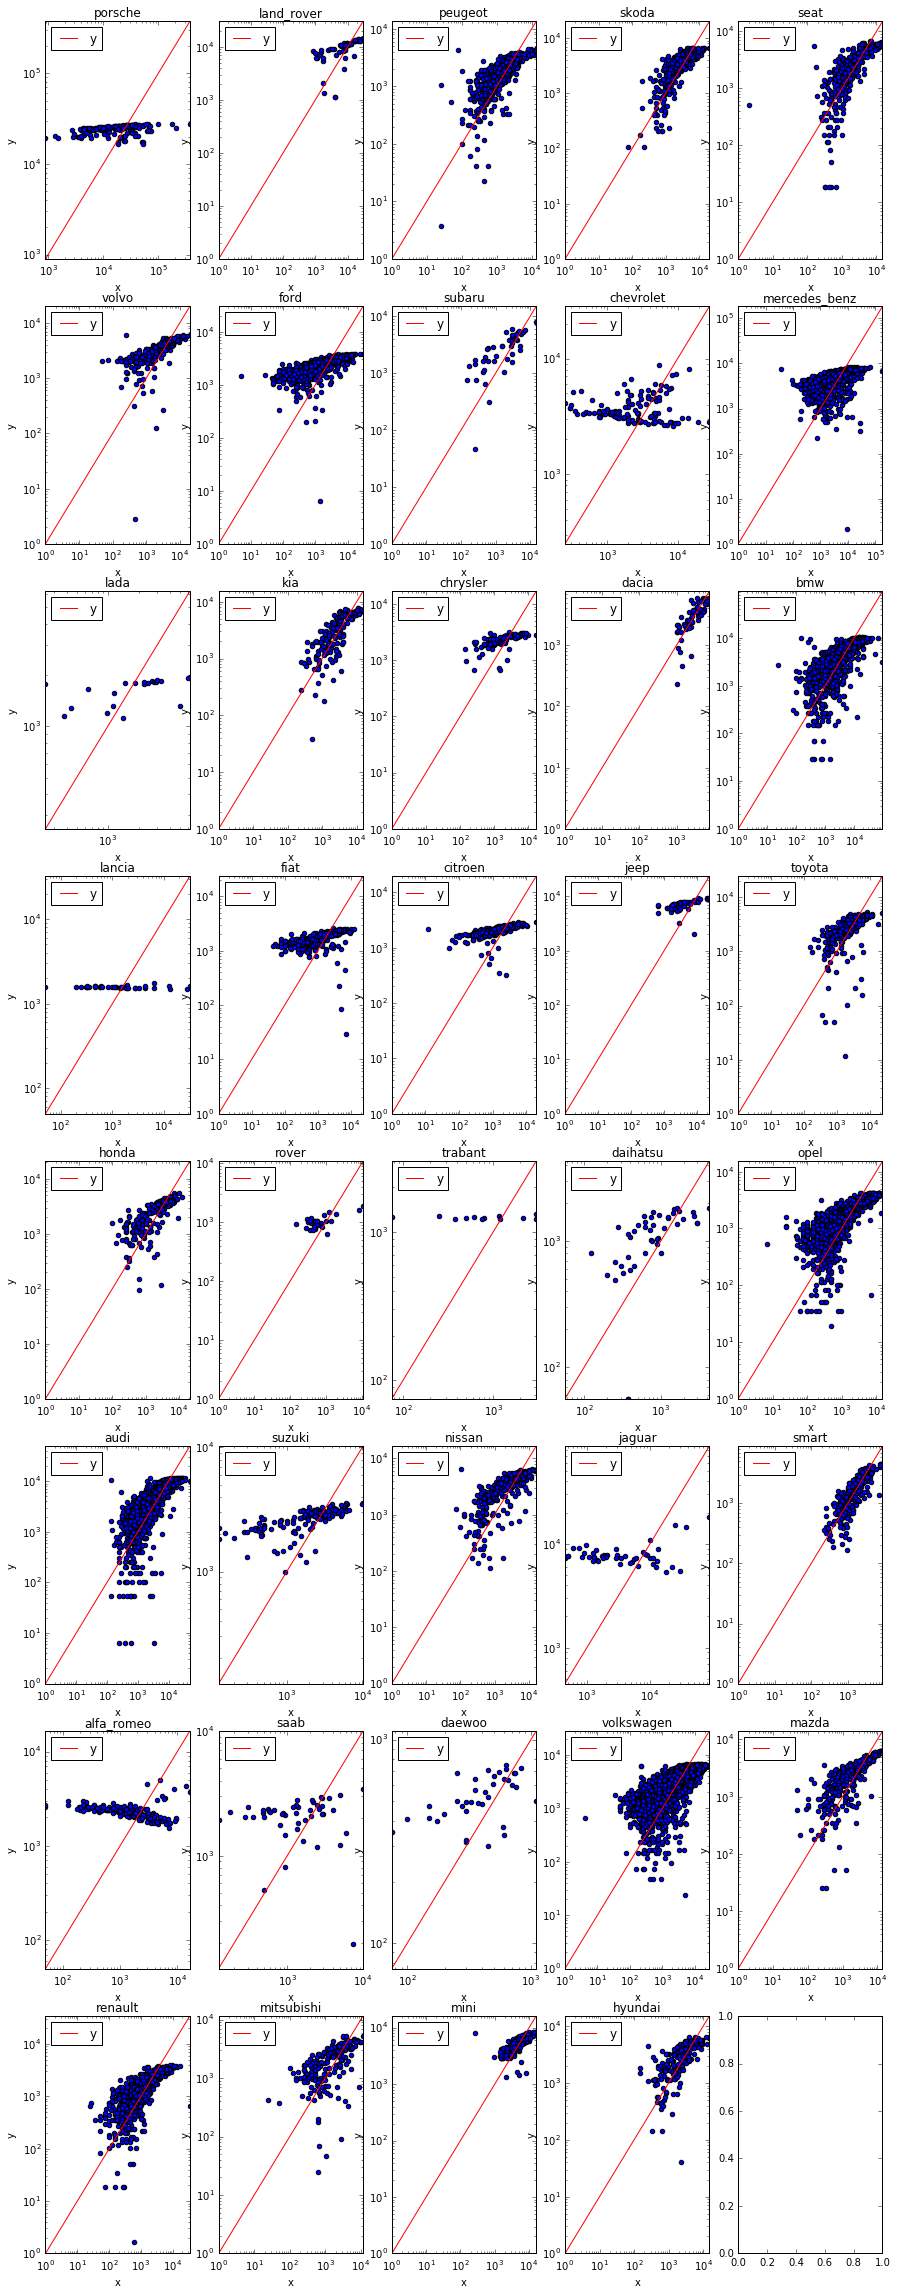

In [36]:
create_confusion_graph(test_df, test_est)

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(test_df["appraisal"], test_est)

18863599.665509999

## 指数回帰モデル

In [39]:
log_train_price = np.log(train_df["appraisal"])
log_test_price = np.log(test_df["appraisal"])

In [40]:
logmodel, log_train_est = model.train(train_features, log_train_price)
log_test_est = model.test(logmodel, test_features)

In [41]:
exp_log_train_est = np.exp(log_train_est)
exp_log_test_est = np.exp(log_test_est)

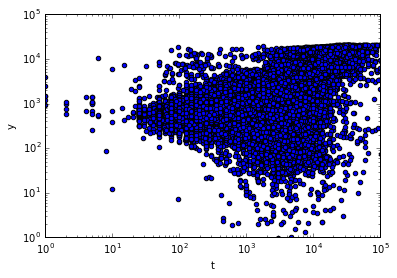

In [42]:
pd.DataFrame(dict(t=train_df["appraisal"], y=exp_log_train_est)).plot(kind="scatter", x="t", y="y", xlim=[1, 100000], ylim=[1, 100000], logx=True, logy=True)

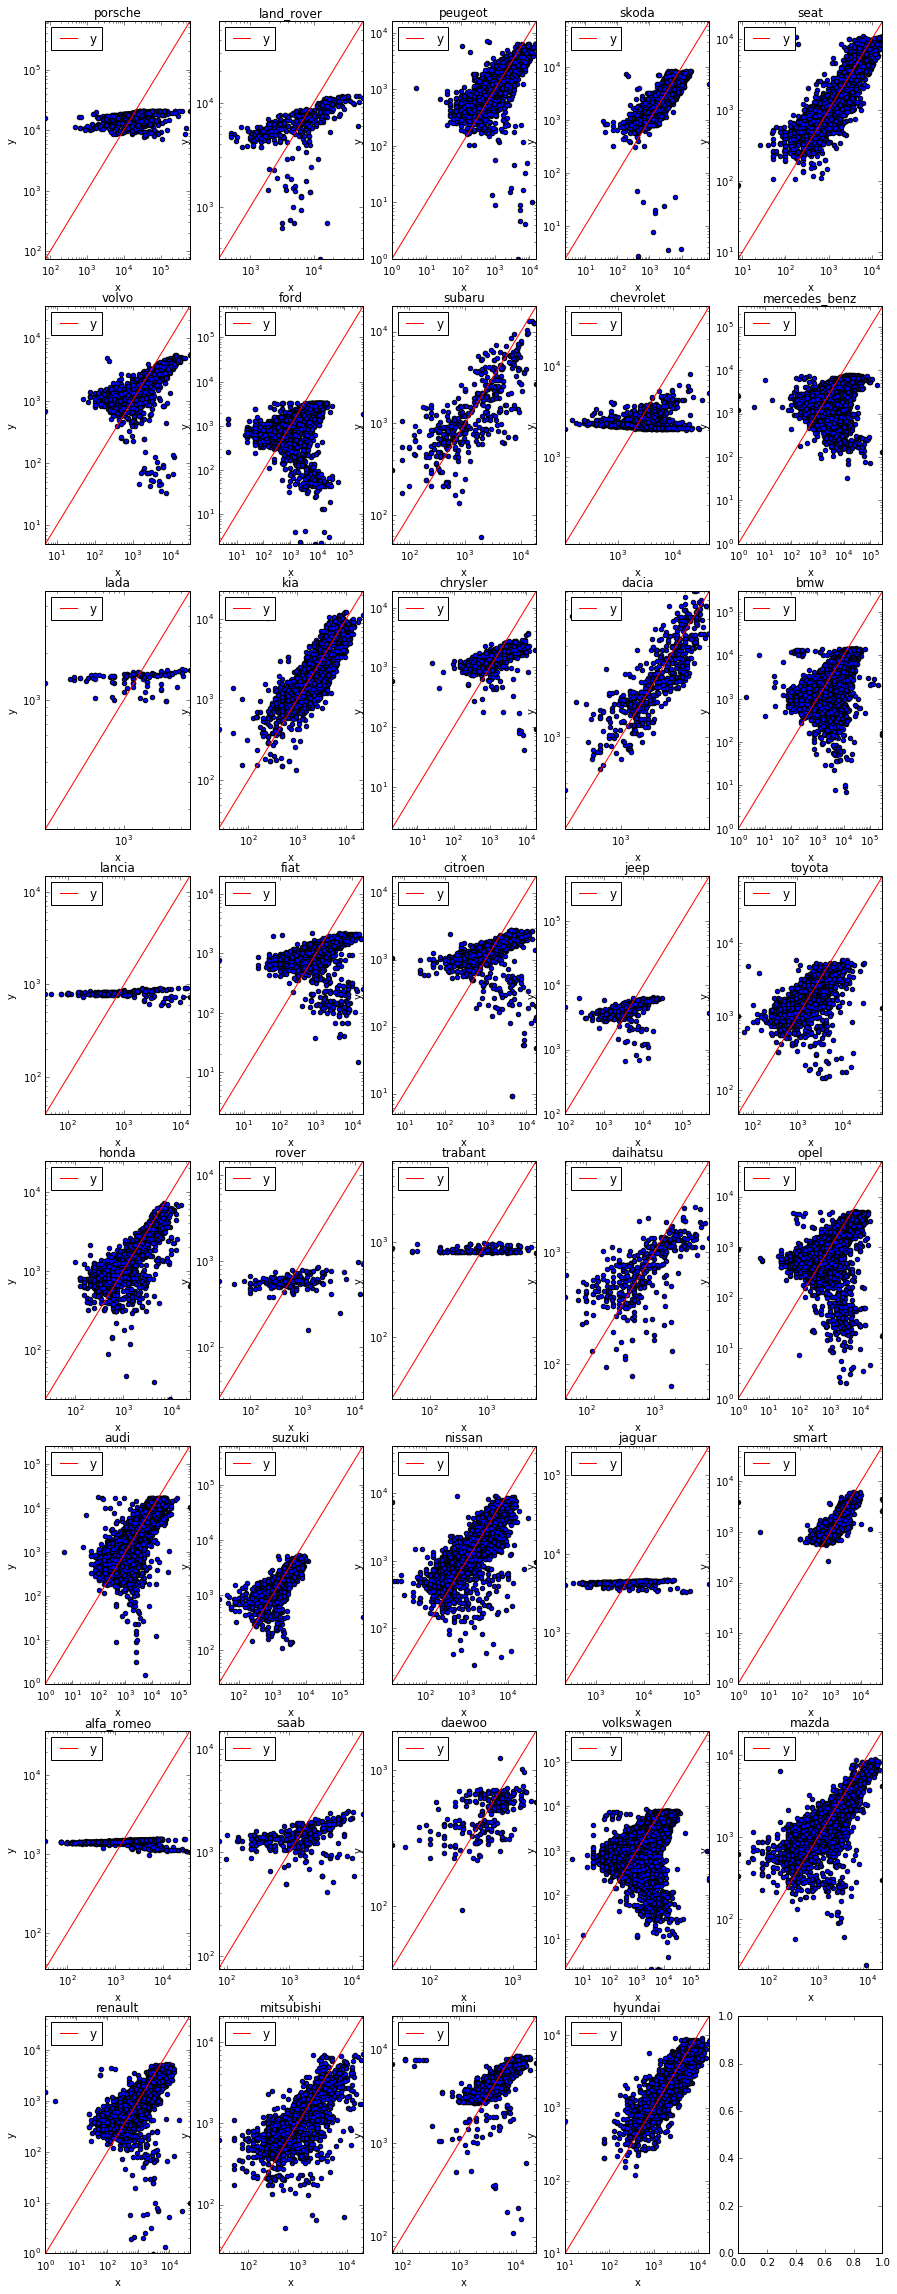

In [43]:
create_confusion_graph(train_df, exp_log_train_est)

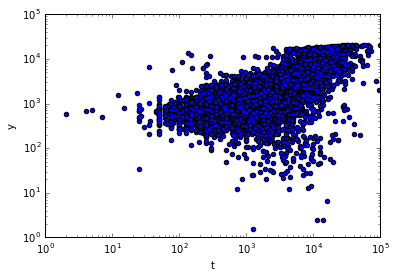

In [44]:
pd.DataFrame(dict(t=test_df["appraisal"], y=exp_log_test_est)).plot(kind="scatter", x="t", y="y", xlim=[1, 100000], ylim=[1, 100000], logx=True, logy=True)

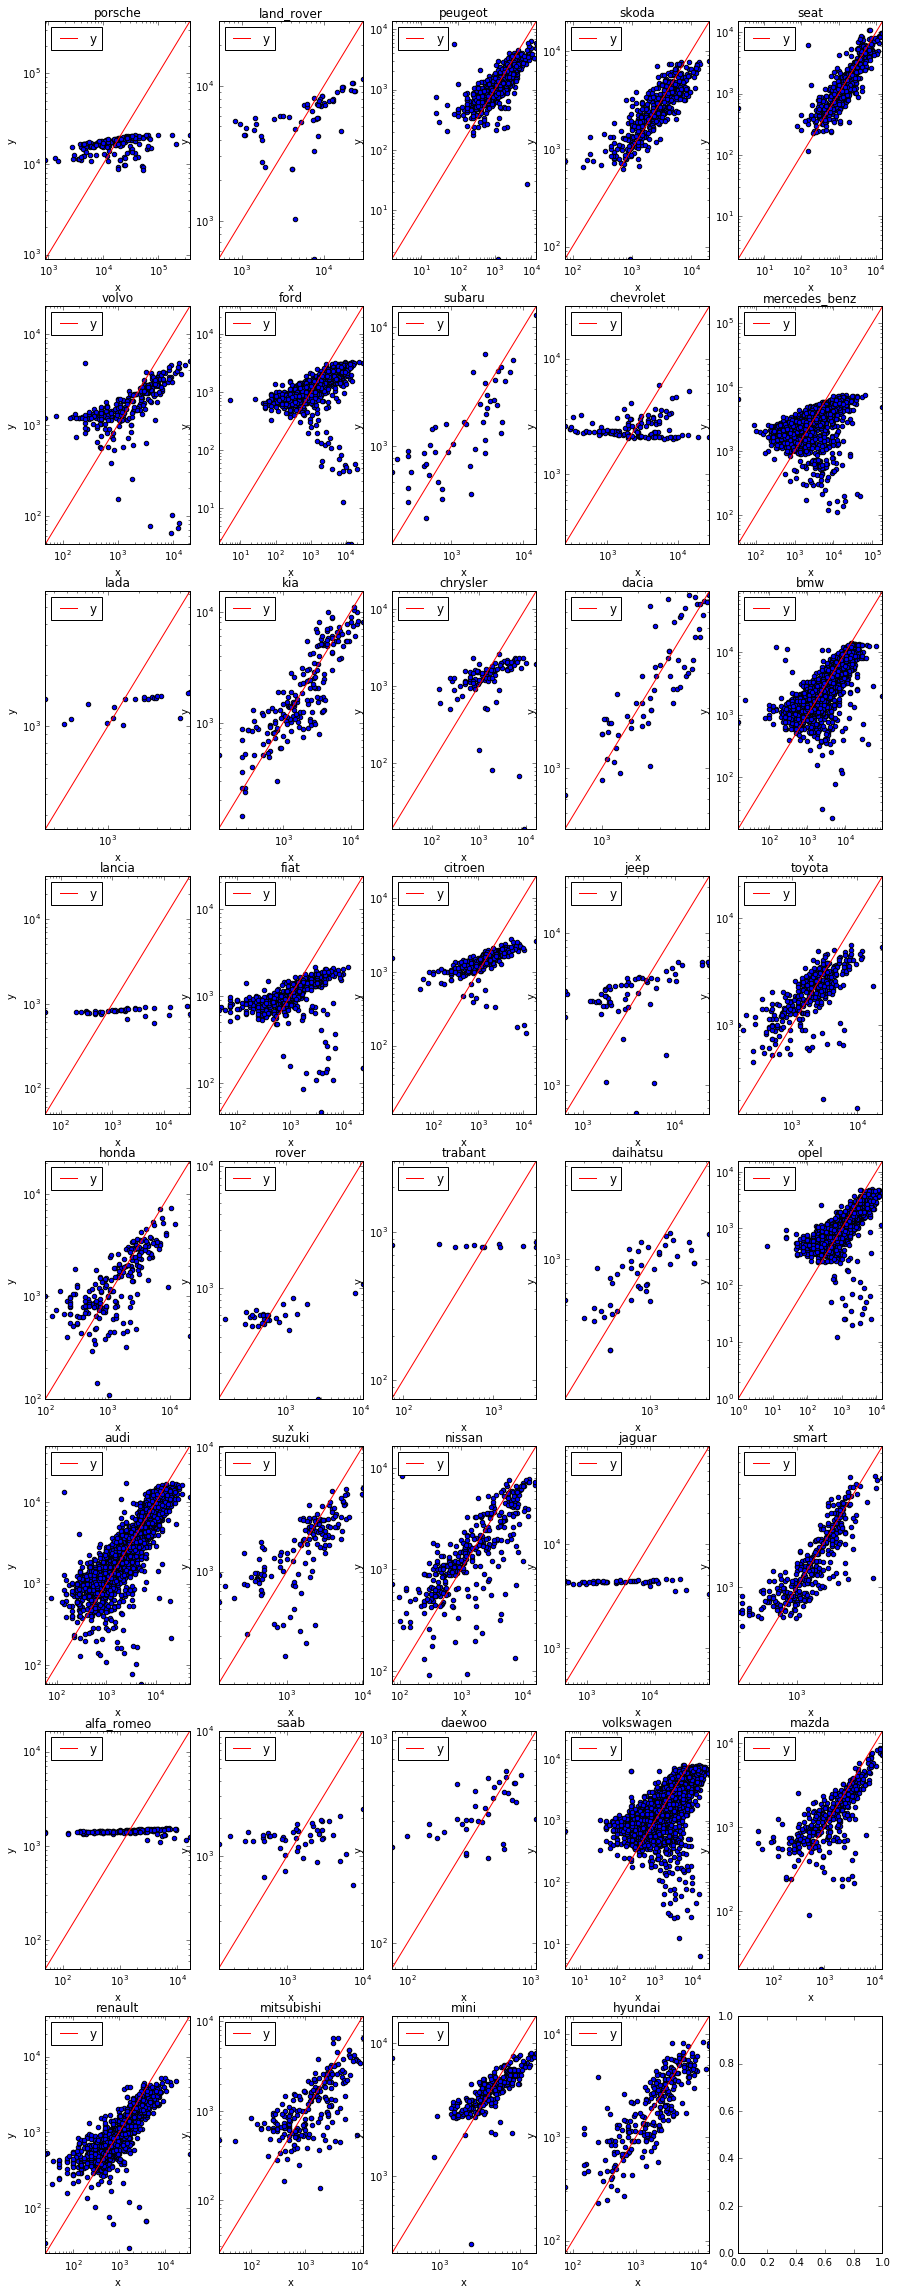

In [45]:
create_confusion_graph(test_df, exp_log_test_est)

In [46]:
mean_squared_error(test_df["appraisal"], exp_log_test_est)

18498618.835133906

# 多項式回帰モデル

In [47]:
mse_train = []
mse_dev = []
mse_test = []
for i in range(1, 15):
    print("degree={}".format(i))
    poly_train_features, poly_dev_features, poly_test_features = data.df_to_feature(train_df, dev_df, test_df, degree=i)
    poly_model, poly_train_est = model.train(poly_train_features, train_df["appraisal"])
    mse_train.append(mean_squared_error(train_df["appraisal"], poly_train_est))
    
    poly_dev_est = model.test(poly_model, poly_dev_features)
    mse_dev.append(mean_squared_error(dev_df["appraisal"], poly_dev_est))
    poly_test_est = model.test(poly_model, poly_test_features)
    mse_test.append(mean_squared_error(test_df["appraisal"], poly_test_est))
    print(" mse_train={}".format(mse_train[-1]))
    print(" mse_dev={}".format(mse_dev[-1]))
    print(" mse_test={}".format(mse_test[-1]))

degree=1
 mse_train=26777346.559836093
 mse_dev=31803571.74956443
 mse_test=18863599.66551
degree=2
 mse_train=22773316.65365593
 mse_dev=27016447.761215188
 mse_test=14936575.140598511
degree=3
 mse_train=21929980.93509132
 mse_dev=25184768.38683917
 mse_test=14039938.092482647
degree=4
 mse_train=21435899.38192899
 mse_dev=24414216.492704906
 mse_test=13302061.449355092
degree=5
 mse_train=21284520.394345097
 mse_dev=23680988.171580296
 mse_test=13004676.16142004
degree=6
 mse_train=21247391.26754386
 mse_dev=24041972.157426566
 mse_test=13215336.30535699
degree=7
 mse_train=21182735.108493485
 mse_dev=42825557.23178559
 mse_test=13414527.224567946
degree=8
 mse_train=21088004.49284363
 mse_dev=306876935.11968327
 mse_test=14436538.566379143
degree=9
 mse_train=21049467.333426695
 mse_dev=4190026911.313958
 mse_test=20051611.939423684
degree=10
 mse_train=20914144.756097116
 mse_dev=4558774134.692982
 mse_test=14730414.492504463
degree=11
 mse_train=20873994.344643045
 mse_dev=773959

In [48]:
mses = pd.DataFrame(dict(train=np.array(mse_train), dev=np.array(mse_dev), test=np.array(mse_test)))

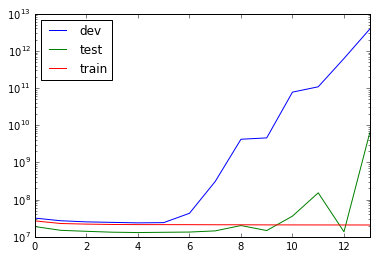

In [49]:
mses.plot(logy=True)

## Lasso回帰

In [53]:
mse_train_lasso = []
mse_dev_lasso = []
mse_test_lasso = []
for i in range(1, 15):
    print("degree={}".format(i))
    poly_train_features, poly_dev_features, poly_test_features = data.df_to_feature(train_df, dev_df, test_df, degree=i)
    poly_model, poly_train_est = model.train(poly_train_features, train_df["appraisal"], kind="lasso")
    mse_train_lasso.append(mean_squared_error(train_df["appraisal"], poly_train_est))
    
    poly_dev_est = model.test(poly_model, poly_dev_features)
    mse_dev_lasso.append(mean_squared_error(dev_df["appraisal"], poly_dev_est))
    poly_test_est = model.test(poly_model, poly_test_features)
    mse_test_lasso.append(mean_squared_error(test_df["appraisal"], poly_test_est))
    print(" mse_train={}".format(mse_train_lasso[-1]))
    print(" mse_dev={}".format(mse_dev_lasso[-1]))
    print(" mse_test={}".format(mse_test_lasso[-1]))

degree=1
 mse_train=26845293.290756647
 mse_dev=31888562.81930966
 mse_test=19017587.202782337
degree=2


/Users/arrow/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


 mse_train=23072377.969842993
 mse_dev=27154538.00975069
 mse_test=15265380.622548442
degree=3
 mse_train=22288598.307986353
 mse_dev=25549862.28305227
 mse_test=14418206.337216828
degree=4
 mse_train=21893507.97676065
 mse_dev=24551885.622759383
 mse_test=13867886.993483918
degree=5
 mse_train=21825739.638100132
 mse_dev=24281910.938535526
 mse_test=13776548.031678906
degree=6
 mse_train=21684013.3788966
 mse_dev=23607869.76504533
 mse_test=13486058.262649357
degree=7
 mse_train=21668926.116545
 mse_dev=23481002.99883054
 mse_test=13462826.843351865
degree=8
 mse_train=21592980.354007725
 mse_dev=22943897.196578816
 mse_test=13250932.6097391
degree=9
 mse_train=21586671.087562706
 mse_dev=22882724.749371313
 mse_test=13241055.59096635
degree=10
 mse_train=21543838.382578216
 mse_dev=22500592.09264233
 mse_test=13092075.167149844
degree=11
 mse_train=21536398.713806678
 mse_dev=22469866.6147739
 mse_test=13087631.981515875
degree=12
 mse_train=21501092.518740732
 mse_dev=22249936.67870

In [54]:
mses_lasso = pd.DataFrame(dict(train=np.array(mse_train_lasso), dev=np.array(mse_dev_lasso), test=np.array(mse_test_lasso)))

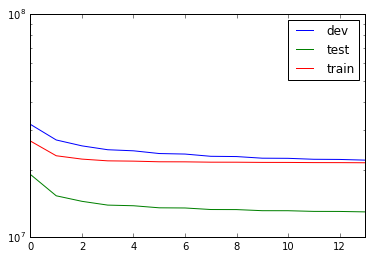

In [55]:
mses_lasso.plot(logy=True)

## Ridge回帰

In [56]:
mse_train_ridge = []
mse_dev_ridge = []
mse_test_ridge = []
for i in range(1, 15):
    print("degree={}".format(i))
    poly_train_features, poly_dev_features, poly_test_features = data.df_to_feature(train_df, dev_df, test_df, degree=i)
    poly_model, poly_train_est = model.train(poly_train_features, train_df["appraisal"], kind="ridge")
    mse_train_ridge.append(mean_squared_error(train_df["appraisal"], poly_train_est))
    
    poly_dev_est = model.test(poly_model, poly_dev_features)
    mse_dev_ridge.append(mean_squared_error(dev_df["appraisal"], poly_dev_est))
    poly_test_est = model.test(poly_model, poly_test_features)
    mse_test_ridge.append(mean_squared_error(test_df["appraisal"], poly_test_est))
    print(" mse_train={}".format(mse_train_ridge[-1]))
    print(" mse_dev={}".format(mse_dev_ridge[-1]))
    print(" mse_test={}".format(mse_test_ridge[-1]))

degree=1
 mse_train=26779332.470758226
 mse_dev=31798864.39586102
 mse_test=18859033.401022363
degree=2
 mse_train=22782367.85354831
 mse_dev=27014078.332589865
 mse_test=14936284.121167056
degree=3
 mse_train=21947967.235121477
 mse_dev=25309620.64525201
 mse_test=14049143.042287925
degree=4
 mse_train=21520737.954111163
 mse_dev=24105318.717102326
 mse_test=13528851.315268436
degree=5
 mse_train=21398821.386376884
 mse_dev=23711597.417382386
 mse_test=13243640.649623742
degree=6
 mse_train=21349990.80114338
 mse_dev=23626889.904125836
 mse_test=13112729.789090574
degree=7
 mse_train=21308053.049715593
 mse_dev=23459006.685919806
 mse_test=13028079.615338907
degree=8
 mse_train=21289457.27665665
 mse_dev=23491063.443569094
 mse_test=12958633.848067619
degree=9
 mse_train=21262336.78739657
 mse_dev=23682206.94386583
 mse_test=12924955.14369072
degree=10
 mse_train=21252856.10507391
 mse_dev=23526940.015740253
 mse_test=12890360.828737719
degree=11
 mse_train=21231135.96499933
 mse_dev=

In [57]:
mses_ridge = pd.DataFrame(dict(train=np.array(mse_train_ridge), dev=np.array(mse_dev_ridge), test=np.array(mse_test_ridge)))

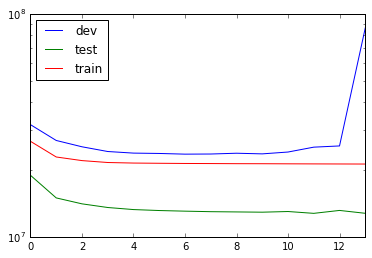

In [58]:
mses_ridge.plot(logy=True)